# Import libs

In [1]:
import pandas as pd
import numpy as np
from models.knn.knn import knn
from models.dmc.dmc import dmc
from models.kmeans.kmeans import kmeans
from models.naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from models.bayes_classifier.bayes_classifier import bayes_classifier
from models.bayes_linear_classifier.bayes_linear_classifier import bayes_linear_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean, min_max_normalization
from matplotlib import pyplot as plt

# Loading normalized Breast Cancer dataset

In [2]:
Xy = pd.read_csv('./datasets/breast_cancer.csv')

X = min_max_normalization(Xy.drop(['diagnosis', 'id'], axis=1))
y = Xy['diagnosis']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
nb_hit_rate_list = []
b_hit_rate_list = []
b_majority_class_hit_rate_list = []
b_mean_class_hit_rate_list = []
lb_hit_rate_list = []

knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
nb_std_dev = 0
b_std_dev = 0
b_majority_class_std_dev = 0
b_mean_class_std_dev = 0
lb_std_dev = 0

knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []
nb_confusion_matrix_list = []
b_confusion_matrix_list = []
b_majority_class_confusion_matrix_list = []
b_mean_class_confusion_matrix_list = []
lb_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    b_majority_class_model = bayes_classifier(covariance_matrix_type='majority_class')
    b_majority_class_model.fit(X_train, y_train)

    b_mean_class_model = bayes_classifier(covariance_matrix_type='mean_class')
    b_mean_class_model.fit(X_train, y_train)

    lb_model = bayes_linear_classifier()
    lb_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))
    b_majority_class_hit_rate_list.append(b_majority_class_model.score(X_test, y_test))
    b_mean_class_hit_rate_list.append(b_mean_class_model.score(X_test, y_test))
    lb_hit_rate_list.append(lb_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]
    b_majority_class_y_pred = [b_majority_class_model.predict(x) for x in X_test.values]
    b_mean_class_y_pred = [b_mean_class_model.predict(x) for x in X_test.values]
    lb_y_pred = [lb_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))
    b_majority_class_confusion_matrix_list.append(confusion_matrix(y_test, b_majority_class_y_pred))
    b_mean_class_confusion_matrix_list.append(confusion_matrix(y_test, b_mean_class_y_pred))
    lb_confusion_matrix_list.append(confusion_matrix(y_test, lb_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)
b_majority_class_std_dev = np.std(b_majority_class_hit_rate_list)
b_mean_class_std_dev = np.std(b_mean_class_hit_rate_list)
lb_std_dev = np.std(lb_hit_rate_list)

w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'floa

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9298245614035088]

Accuracy:
0.9635964912280702

Standard Deviation:
0.014750150632280896

Confusion Matrix:
    M   B
M  35   4
B   1  74
    M   B
M  37   6
B   1  70
    B   M
B  68   2
M   2  42
    B   M
B  70   0
M   2  42
    M   B
M  44   1
B   1  68
    B   M
B  68   2
M   5  39
    M   B
M  40   5
B   0  69
    B   M
B  68   3
M   2  41
    B   M
B  69   0
M   4  41
    M   B
M  45   0
B   3  66
    M   B
M  38   2
B   1  73
    B   M
B  65   0
M   2  47
    B   M
B  70   1
M   3  40
    M   B
M  45   2
B   2  65
    B   M
B  65   1
M   1  47
    B 

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,M,B
M,40,2
B,1,69


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.9298245614035088, 0.8947368421052632, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.9473684210526315, 0.9824561403508771, 0.9298245614035088, 0.956140350877193, 0.9035087719298246, 0.9298245614035088, 0.956140350877193, 0.9210526315789473, 0.9298245614035088, 0.9035087719298246, 0.9473684210526315, 0.8947368421052632]

Accuracy:
0.9346491228070175

Standard Deviation:
0.023286954302558373

Confusion Matrix:
    M   B
M  32   7
B   1  74
    M   B
M  32  11
B   1  70
    B   M
B  68   2
M   4  40
    B   M
B  69   1
M   8  36
    M   B
M  41   4
B   2  67
    B   M
B  70   0
M   5  39
    M   B
M  38   7
B   1  68
    B   M
B  69   2
M   2  41
    B   M
B  68   1
M   5  40
    M   B
M  43   2
B   0  69
    M   B
M  37   3
B   5  69
    B   M
B  63   2
M   3  46
    B   M
B  68   3
M   8  35
    M   B
M  42   5
B   3  64
    B   M
B  64   2
M   3  45
    B

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,M,B
M,37,5
B,1,68


# Showing kmeans informations computed

In [8]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[0.9736842105263158, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.9736842105263158, 0.9122807017543859, 0.9122807017543859, 0.9736842105263158, 0.956140350877193, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9824561403508771, 0.8508771929824561, 0.9298245614035088, 0.9035087719298246, 0.9649122807017544, 0.9035087719298246]

Accuracy:
0.9407894736842106

Standard Deviation:
0.031975459003037145

Confusion Matrix:
    M   B
M  37   2
B   1  74
    M   B
M  39   4
B   2  69
    B   M
B  65   5
M   2  42
    B   M
B  69   1
M   2  42
    M   B
M  42   3
B   0  69
    B   M
B  65   5
M   5  39
    M   B
M  35  10
B   0  69
    B   M
B  71   0
M   3  40
    B   M
B  67   2
M   3  42
    M   B
M  45   0
B   9  60
    M   B
M  39   1
B   4  70
    B   M
B  62   3
M   3  46
    B   M
B  67   4
M   3  40
    M   B
M  45   2
B   3  64
    B   M
B  64   2
M   0  48
  

In [9]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

,M,B
M,39,4
B,2,68


# Showing naive bayes informations computed

In [10]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.9122807017543859, 0.8771929824561403, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.9824561403508771, 0.8947368421052632, 0.9473684210526315, 0.8771929824561403, 0.9473684210526315, 0.9385964912280702, 0.8859649122807017, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.8947368421052632]

Accuracy:
0.9285087719298246

Standard Deviation:
0.02873058111431986

Confusion Matrix:
    M   B
M  33   6
B   4  71
    M   B
M  34   9
B   5  66
    B   M
B  65   5
M   3  41
    B   M
B  68   2
M   5  39
    M   B
M  42   3
B   4  65
    B   M
B  68   2
M   3  41
    M   B
M  38   7
B   1  68
    B   M
B  69   2
M   2  41
    B   M
B  68   1
M   6  39
    M   B
M  45   0
B   2  67
    M   B
M  37   3
B   9  65
    B   M
B  61   4
M   2  47
    B   M
B  64   7
M   7  36
    M   B
M  44   3
B   3  64
    B   M
B  62   4
M   3  

In [11]:
confusion_matrix_mean(nb_confusion_matrix_list)

,M,B
M,38,4
B,3,67


# Showing bayes informations computed

In [12]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.9649122807017544, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9649122807017544, 0.9122807017543859, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9298245614035088, 0.956140350877193, 0.9385964912280702]

Accuracy:
0.9486842105263158

Standard Deviation:
0.015512929108620526

Confusion Matrix:
    M   B
M  38   1
B   3  72
    M   B
M  37   6
B   1  70
    B   M
B  67   3
M   5  39
    B   M
B  68   2
M   5  39
    M   B
M  43   2
B   3  66
    B   M
B  67   3
M   2  42
    M   B
M  41   4
B   2  67
    B   M
B  70   1
M   2  41
    B   M
B  68   1
M   5  40
    M   B
M  45   0
B   3  66
    M   B
M  38   2
B   5  69
    B   M
B  63   2
M   2  47
    B   M
B  65   6
M   4  39
    M   B
M  46   1
B   4  63
    B   M
B  61   5
M   1  47
    

In [13]:
confusion_matrix_mean(b_confusion_matrix_list)

,M,B
M,40,2
B,3,67


# Showing Bayes Majority Class Informations computed

In [14]:
print('----------------- BAYES M C model -----------------')
print('Hit rate:')
print(b_majority_class_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_majority_class_hit_rate_list)/len(b_majority_class_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_majority_class_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_majority_class_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES M C model -----------------
Hit rate:
[0.8421052631578947, 0.7631578947368421, 0.8421052631578947, 0.8157894736842105, 0.868421052631579, 0.8771929824561403, 0.8508771929824561, 0.8333333333333334, 0.7719298245614035, 0.8596491228070176, 0.8771929824561403, 0.8421052631578947, 0.8157894736842105, 0.7982456140350878, 0.8421052631578947, 0.7807017543859649, 0.868421052631579, 0.7807017543859649, 0.8508771929824561, 0.8859649122807017]

Accuracy:
0.8333333333333334

Standard Deviation:
0.036590620376516156

Confusion Matrix:
    M   B
M  21  18
B   0  75
    M   B
M  16  27
B   0  71
    B   M
B  69   1
M  17  27
    B   M
B  70   0
M  21  23
    M   B
M  30  15
B   0  69
    B   M
B  70   0
M  14  30
    M   B
M  28  17
B   0  69
    B   M
B  71   0
M  19  24
    B   M
B  69   0
M  26  19
    M   B
M  29  16
B   0  69
    M   B
M  27  13
B   1  73
    B   M
B  64   1
M  17  32
    B   M
B  71   0
M  21  22
    M   B
M  24  23
B   0  67
    B   M
B  66   0
M  18  3

In [15]:
confusion_matrix_mean(b_majority_class_confusion_matrix_list)

,M,B
M,24,18
B,0,70


# Showing Bayes Mean Class informations computed

In [16]:
print('----------------- BAYES MEAN C model -----------------')
print('Hit rate:')
print(b_mean_class_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_mean_class_hit_rate_list)/len(b_mean_class_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_mean_class_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_mean_class_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES MEAN C model -----------------
Hit rate:
[0.956140350877193, 0.9210526315789473, 0.9473684210526315, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9824561403508771, 0.956140350877193]

Accuracy:
0.9583333333333333

Standard Deviation:
0.019392711376696608

Confusion Matrix:
    M   B
M  34   5
B   0  75
    M   B
M  34   9
B   0  71
    B   M
B  70   0
M   6  38
    B   M
B  70   0
M   2  42
    M   B
M  43   2
B   0  69
    B   M
B  70   0
M   4  40
    M   B
M  41   4
B   0  69
    B   M
B  71   0
M   3  40
    B   M
B  69   0
M   5  40
    M   B
M  43   2
B   0  69
    M   B
M  39   1
B   1  73
    B   M
B  64   1
M   3  46
    B   M
B  71   0
M   5  38
    M   B
M  39   8
B   1  66
    B   M
B  65   1
M   6  4

In [17]:
confusion_matrix_mean(b_mean_class_confusion_matrix_list)

,M,B
M,38,4
B,0,70


# Showing Linear Bayes informations computed

In [18]:
print('----------------- LINEAR BAYES model -----------------')
print('Hit rate:')
print(lb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(lb_hit_rate_list)/len(lb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(lb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in lb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- LINEAR BAYES model -----------------
Hit rate:
[0.9122807017543859, 0.8508771929824561, 0.9473684210526315, 0.8859649122807017, 0.956140350877193, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.8947368421052632, 0.9736842105263158, 0.9473684210526315, 0.9298245614035088, 0.9122807017543859, 0.868421052631579, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.8947368421052632, 0.9649122807017544, 0.9385964912280702]

Accuracy:
0.9219298245614034

Standard Deviation:
0.0306264741229756

Confusion Matrix:
    M   B
M  29  10
B   0  75
    M   B
M  26  17
B   0  71
    B   M
B  70   0
M   6  38
    B   M
B  70   0
M  13  31
    M   B
M  40   5
B   0  69
    B   M
B  70   0
M   8  36
    M   B
M  36   9
B   0  69
    B   M
B  71   0
M   7  36
    B   M
B  69   0
M  12  33
    M   B
M  42   3
B   0  69
    M   B
M  35   5
B   1  73
    B   M
B  65   0
M   8  41
    B   M
B  71   0
M  10  33
    M   B
M  33  14
B   1  66
    B   M
B  66   0
M   8  

In [19]:
confusion_matrix_mean(lb_confusion_matrix_list)

,M,B
M,34,8
B,0,70


# Choosing two columns from the last X_train and X_test to plot decision surface

In [21]:
X_train_2d, X_test_2d = X_train[['radius_mean', 'texture_mean']], X_test[['radius_mean', 'texture_mean']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     radius_mean  texture_mean
135     0.273984      0.431518
463     0.218609      0.292526
3       0.210090      0.360839
186     0.536182      0.299966
383     0.255999      0.262766
..           ...           ...
359     0.116191      0.291173
203     0.323205      0.474806
561     0.199678      0.664863
120     0.209617      0.037538
379     0.193999      0.308421

[455 rows x 2 columns]
Test dataset:
     radius_mean  texture_mean
465     0.296228      0.352384
116     0.093189      0.204599
73      0.322732      0.205614
9       0.259312      0.484613
340     0.352075      0.230977
..           ...           ...
554     0.279190      0.649645
295     0.321312      0.120392
37      0.286289      0.294555
469     0.219556      0.286439
50      0.226182      0.402097

[114 rows x 2 columns]


# Training the models with the new dataset 2d

In [22]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)
b_majority_class_model = bayes_classifier(covariance_matrix_type='majority_class')
b_majority_class_model.fit(X_train_2d, y_train)
b_mean_class_model = bayes_classifier(covariance_matrix_type='mean_class')
b_mean_class_model.fit(X_train_2d, y_train)
lb_model = bayes_linear_classifier()
lb_model.fit(X_train_2d, y_train)

w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

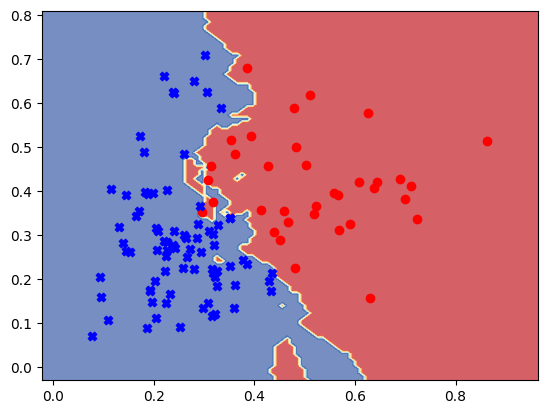

In [23]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

M = np.where(knn_y_pred == 'M')
B = np.where(knn_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting dmc decision surface

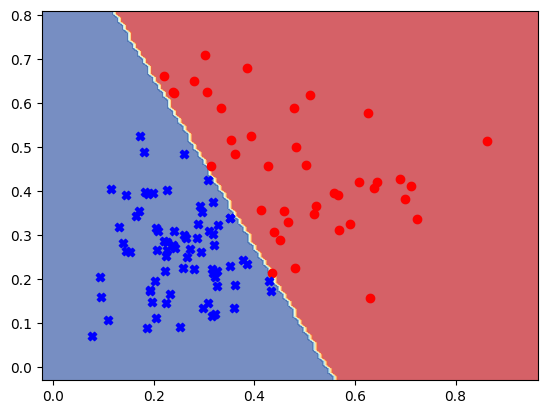

In [24]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

M = np.where(dmc_y_pred == 'M')
B = np.where(dmc_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting kmeans decision surface

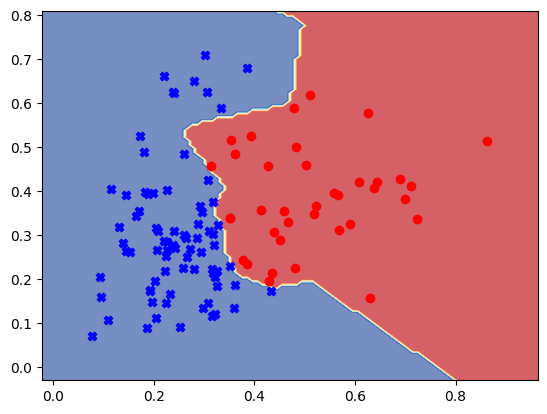

In [25]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

M = np.where(kmeans_y_pred == 'M')
B = np.where(kmeans_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting naive bayes decision surface

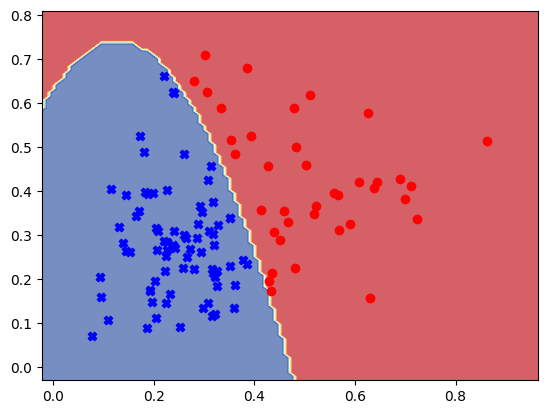

In [26]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

M = np.where(nb_y_pred == 'M')
B = np.where(nb_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting bayes decision surface

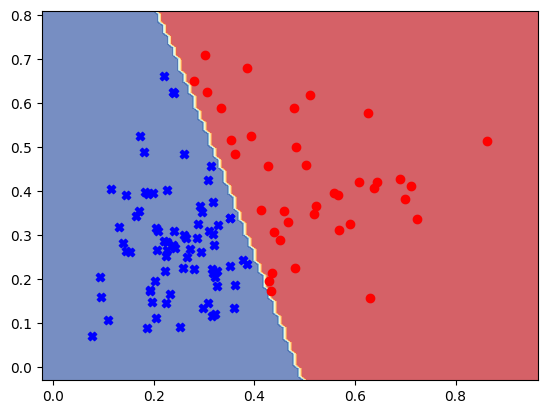

In [27]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

M = np.where(b_y_pred == 'M')
B = np.where(b_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting bayes majority class decision surface

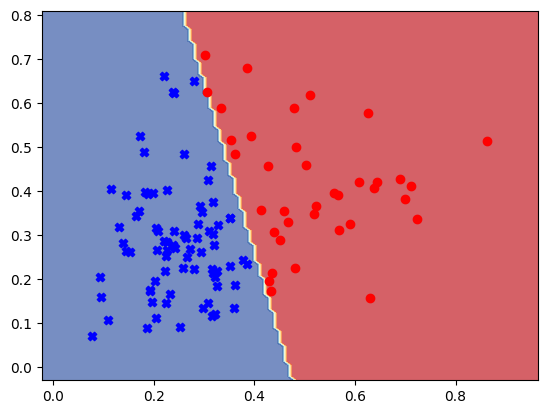

In [28]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_majority_class_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_majority_class_y_pred = np.array([b_majority_class_model.predict(x) for x in X_test_2d.values])

M = np.where(b_majority_class_y_pred == 'M')
B = np.where(b_majority_class_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting bayes mean class decision surface

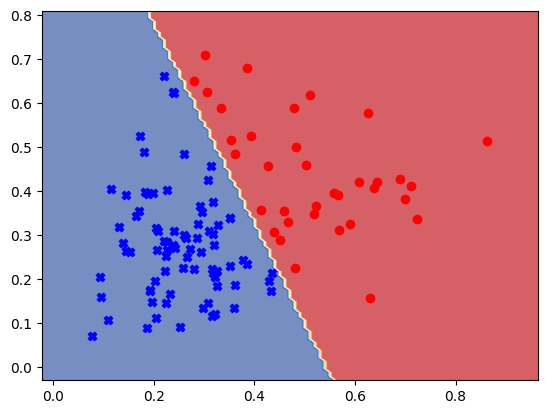

In [29]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_mean_class_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_mean_class_y_pred = np.array([b_mean_class_model.predict(x) for x in X_test_2d.values])

M = np.where(b_mean_class_y_pred == 'M')
B = np.where(b_mean_class_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting linear bayes decision surface

In [ ]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[lb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

lb_y_pred = np.array([lb_model.predict(x) for x in X_test_2d.values])

M = np.where(lb_y_pred == 'M')
B = np.where(lb_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()